# 2021 회귀 결과(XGBoost,GBM이 R2가 가장 높음= 0.82)  
- LinearRegression, Ridge, Lasso  
MSE: 0.1440554795280862, RMSE: 0.37954641287737945, R2: 0.7397822180837986  
LinearRegression RMSE:  0.38  
Ridge RMSE:  0.378  
Lasso RMSE:  0.719  

- LinearRegression, Ridge, Lasso(GridSearchCV)  
MSE: 0.1440554795280862, RMSE: 0.37954641287737945, R2: 0.7397822180837986  
LinearRegression RMSE:  0.38  
Ridge RMSE:  0.378  
Lasso RMSE:  0.719  

- RandomForestRegressor(log1p적용)  
MSE: 0.075077457259289, RMSE: 0.2740026592193751, R2: 0.786735699201359  

- RandomForestRegressor(GridSearchCV)  
MSE: 0.07527599102077545, RMSE: 0.2743647044005031, R2: 0.7861717461137883  


- XGBoost  
MSE: 0.06161133642861849, RMSE: 0.24821630975546005, R2: 0.824987432121731  

- GBM  
RMSE:  0.248, R2: 0.824987432121731  

- LightGBM  
RMSE:  0.307, R2: 0.7324906316464928  

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 전처리


In [2]:
test5 = pd.read_csv('2021_전처리_최종.csv')
test5

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
0,394771.177262,3.163243,-1.061946,-0.374106,0.591011,0.0,270,270,2.0,270,0.0,0.0,0.0,36.0,1,4,4,1,1,1547.0
1,400224.921400,3.559497,-1.218942,0.989798,-1.477465,0.0,290,320,2.6,270,0.0,0.0,0.0,43.0,0,5,4,1,2,1664.0
2,404194.648783,3.600708,-1.194788,0.081099,-1.221170,0.0,320,270,2.0,270,0.0,0.0,0.0,47.0,0,6,4,1,3,1526.0
3,463540.989846,3.206660,-1.110252,-1.484950,-0.500306,0.0,70,50,1.7,50,0.0,0.0,0.0,50.0,0,0,4,1,4,2555.0
4,464148.686979,3.568812,-1.146482,1.157934,-0.777131,0.0,340,290,2.9,290,0.0,0.0,0.0,37.0,0,1,4,1,5,2369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,475550.135975,3.888188,-1.146482,-1.569873,-0.063383,0.0,340,20,1.7,50,0.0,0.0,0.0,33.0,0,0,4,12,27,3517.0
361,477997.804696,3.133569,-1.013640,-1.743140,1.340293,0.0,50,50,2.2,50,0.0,0.0,0.0,60.0,0,1,4,12,28,4214.0
362,478029.061412,2.202502,-0.856644,1.529926,1.000339,0.2,270,270,2.6,50,0.3,0.3,1.0,70.0,0,2,4,12,29,4126.0
363,476656.880846,3.200306,-1.146482,2.355412,-0.804289,0.0,320,290,3.3,270,0.0,0.0,0.0,30.0,0,3,4,12,30,3883.0


In [3]:
test5 = test5.fillna(test5.mean())

In [4]:
test5.isna().sum()

총생활인구수            0
기온                0
기압                0
풍속                0
운량                0
일강수량              0
최대순간풍속풍향          0
최대풍속풍향            0
평균풍속              0
최다풍향              0
일최심적설             0
일최심신적설            0
강수여부              0
일 미세먼지 농도(㎍/㎥)    0
휴일여부              0
요일                0
계절                0
month             0
day               0
영등포구              0
dtype: int64

# LinearRegression, Ridge, Lasso

In [5]:
test5[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [6]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [7]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [8]:
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  1529.653
Ridge RMSE:  1539.968
Lasso RMSE:  1531.26


[1529.6531131043603, 1539.9683939668553, 1531.2604375521576]

In [9]:
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>1]
skew_features_top.sort_values(ascending=False)

일최심신적설            7.759141
일최심적설             5.414253
일강수량              4.863083
일 미세먼지 농도(㎍/㎥)    4.270303
dtype: float64

In [10]:
# 왜곡도 1 이상은 로그로 변환
test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

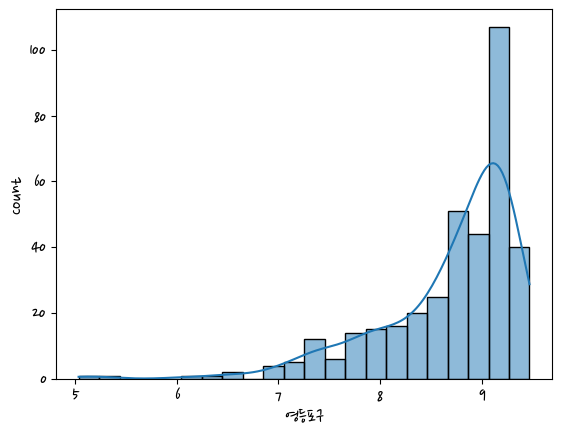

In [11]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True)

In [12]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [13]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.1020916254490923, RMSE: 0.3195178014588425, R2: 0.7099995136542321
LinearRegression RMSE:  0.32
Ridge RMSE:  0.309
Lasso RMSE:  0.578


[0.3195178014588425, 0.3087156672032049, 0.5783911838403554]

In [14]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

9337.000000000007, 9507.400161931248
7968.0000000000055, 8647.120792053569
2553.0000000000005, 1525.4403476105217
12961.00000000001, 11871.45267578506
12360.0, 12564.477535601342
7135.000000000004, 4921.72248089408
1245.0, 2455.495400696401
7810.000000000003, 9525.068461745246
6832.0, 4372.659899268104
3422.9999999999973, 3530.1440135294665
6723.999999999995, 12205.00535582395
1650.0000000000007, 1208.278269332876
9233.000000000005, 6297.746410912312
10804.999999999995, 11717.02502038422
10514.000000000005, 8375.285740073476
2708.000000000001, 2636.7367706757514
6105.000000000004, 5501.0486701631835
12763.999999999998, 15244.844758142384
8104.999999999997, 8274.42291294172
5853.000000000004, 11449.242132056119
7522.000000000001, 7584.3116334514825
9205.999999999995, 11207.589141321569
4140.999999999998, 4819.508298743864
4547.999999999996, 4115.524399234916
5841.0, 5706.717490985144
7479.999999999995, 4989.677626120388
3591.9999999999977, 4324.6774058942865
2670.0000000000005, 3384.809

## cross_val_score

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [16]:
X_data = test5.drop(columns=['영등포구'])
y_target = test5['영등포구']


ridge = Ridge(alpha=5)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [17]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)) #rmse = 5개가 나올 것
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [5.00000000e-01 9.99675871e+06 6.48893566e+06 5.46000000e-01
 8.29182325e+06]
LinearRegression cv 평균 rmse 값 : 4955503.733
Ridge cv rmse 값 리스트 : [0.509 0.438 0.386 0.44  0.342]
Ridge cv 평균 rmse 값 : 0.423
Lasso cv rmse 값 리스트 : [1.141 0.715 0.473 0.714 0.519]
Lasso cv 평균 rmse 값 : 0.712


## GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=10) #GridSearchCV라서 scoring='neg' #scoring='neg_mean_squared_error' 예측값과 차이의 제곱?
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse, 4)}, 최적 alpha값:{grid_model.best_params_}')

In [20]:
ridge_param = {
    'alpha':[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
} #ridge더 크게 rasso 더 작게
print_best_params(ridge_reg, ridge_param)

Ridge 5 cv시 최적 평균 rmse 값:0.3879, 최적 alpha값:{'alpha': 5}


In [21]:
lasso_param = {'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.05, 0.1, 0.5, 1, 5, 10, 15, 30]} 
print_best_params(lasso_reg, lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.366, 최적 alpha값:{'alpha': 0.005}


In [22]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)

models=[lr_reg, ridge_reg,lasso_reg] 
get_rmses(models)

#visualize_coefficient(models)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


LinearRegression RMSE:  0.32
Ridge RMSE:  0.293
Lasso RMSE:  0.282
MSE: 0.1020916254490923, RMSE: 0.3195178014588425, R2: 0.7099995136542321


In [23]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')




ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_rmse(model)

MSE: 0.1020916254490923, RMSE: 0.3195178014588425, R2: 0.7099995136542321
LinearRegression RMSE:  0.32
Ridge RMSE:  0.309
Lasso RMSE:  0.578


# RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [26]:
rf_clf = RandomForestRegressor(random_state=156, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.08120158057616636, RMSE: 0.28495891032948306, R2: 0.7693395735884753


In [27]:
log_test = np.log1p(test5['영등포구'])
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [28]:
rf_clf = RandomForestRegressor(random_state=32, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

MSE: 0.075077457259289, RMSE: 0.2740026592193751, R2: 0.786735699201359


## GridSearchCV 
RandomForestRegressor - 하이퍼 파라미터 수정

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'max_depth': [6, 12, 18, 26, 30],
    'min_samples_leaf': [1, 6, 12, 18, 24],
    'min_samples_split':[2, 6, 12, 18, 24]
}

In [31]:
rf_clf = RandomForestRegressor(n_estimators=100, random_state=32, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

최적 하이퍼 파라미너:
 {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [32]:
rf_clf1    = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=1, min_samples_split=6, random_state=32)
rf_clf1.fit(X_train,y_train)

pred = rf_clf1.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.07527599102077545, RMSE: 0.2743647044005031, R2: 0.7861717461137883


# XGBoost 

In [33]:
import xgboost as xgb
from xgboost import XGBRegressor

In [34]:
import xgboost

print(xgboost.__version__)

1.5.0


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [36]:
#학습용(80%), 데이터용(20%)
log_test = np.log1p(test5['영등포구'])
#test = test5['영등포구']
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [37]:
#최종 학습용(90%), 검즘용(10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [38]:
#학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [39]:
params = {
    'max_depth':3,
    'eta':0.05,
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [40]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=500, evals=eval_list)

# pred = xgb_model.predict(dtest)
# print(pred)

pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


[0]	train-rmse:7.82361	eval-rmse:7.69207
[1]	train-rmse:7.43717	eval-rmse:7.30279
[2]	train-rmse:7.07004	eval-rmse:6.93302
[3]	train-rmse:6.72103	eval-rmse:6.57846
[4]	train-rmse:6.38943	eval-rmse:6.24653
[5]	train-rmse:6.07433	eval-rmse:5.92548
[6]	train-rmse:5.77489	eval-rmse:5.62844
[7]	train-rmse:5.49042	eval-rmse:5.34021
[8]	train-rmse:5.22003	eval-rmse:5.07138
[9]	train-rmse:4.96295	eval-rmse:4.80929
[10]	train-rmse:4.71874	eval-rmse:4.56698
[11]	train-rmse:4.48653	eval-rmse:4.33417
[12]	train-rmse:4.26596	eval-rmse:4.11486
[13]	train-rmse:4.05626	eval-rmse:3.90133
[14]	train-rmse:3.85698	eval-rmse:3.70042
[15]	train-rmse:3.66753	eval-rmse:3.51139
[16]	train-rmse:3.48761	eval-rmse:3.33549
[17]	train-rmse:3.31662	eval-rmse:3.16224
[18]	train-rmse:3.15401	eval-rmse:3.00113
[19]	train-rmse:2.99960	eval-rmse:2.84933
[20]	train-rmse:2.85282	eval-rmse:2.70314
[21]	train-rmse:2.71333	eval-rmse:2.56779
[22]	train-rmse:2.58081	eval-rmse:2.44303
[23]	train-rmse:2.45482	eval-rmse:2.31792
[2

In [41]:
y_t= np.expm1(y_test)
p_t = pd.Series(np.expm1(pred))
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

# mse = mean_squared_error(dtest, pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

9337.000000000007, 9951.421875
7968.0000000000055, 7764.669921875
2553.0000000000005, 1567.0406494140625
12961.00000000001, 11381.662109375
12360.0, 11439.2978515625
7135.000000000004, 5218.28076171875
1245.0, 1280.01123046875
7810.000000000003, 9910.474609375
6832.0, 4027.899658203125
3422.9999999999973, 4199.875
6723.999999999995, 9333.0224609375
1650.0000000000007, 1112.1348876953125
9233.000000000005, 9066.990234375
10804.999999999995, 8948.74609375
10514.000000000005, 9656.833984375
2708.000000000001, 2507.501220703125
6105.000000000004, 4978.03271484375
12763.999999999998, 11859.095703125
8104.999999999997, 9090.5078125
5853.000000000004, 7435.52392578125
7522.000000000001, 6924.59619140625
9205.999999999995, 9031.87890625
4140.999999999998, 4594.86328125
4547.999999999996, 4606.294921875
5841.0, 6498.37841796875
7479.999999999995, 6874.49609375
3591.9999999999977, 4180.0146484375
2670.0000000000005, 3727.4013671875
10020.999999999998, 9111.8359375
4722.000000000004, 5464.9057617

# GBM

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [43]:
gb_ref = GradientBoostingRegressor(random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.248
R2: 0.824987432121731


In [45]:
gb_ref = GradientBoostingRegressor(n_estimators=200, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.248
R2: 0.824987432121731


# LightGBM

In [46]:
from lightgbm import LGBMRegressor

In [47]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=32)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

[1]	training's l2: 0.47887	valid_1's l2: 0.358806
Training until validation scores don't improve for 100 rounds
[2]	training's l2: 0.448712	valid_1's l2: 0.340402
[3]	training's l2: 0.421495	valid_1's l2: 0.323998
[4]	training's l2: 0.397244	valid_1's l2: 0.307492
[5]	training's l2: 0.374825	valid_1's l2: 0.295156
[6]	training's l2: 0.354906	valid_1's l2: 0.28202
[7]	training's l2: 0.335432	valid_1's l2: 0.267324
[8]	training's l2: 0.317451	valid_1's l2: 0.257014
[9]	training's l2: 0.301551	valid_1's l2: 0.245347
[10]	training's l2: 0.286614	valid_1's l2: 0.237039
[11]	training's l2: 0.273372	valid_1's l2: 0.226947
[12]	training's l2: 0.261058	valid_1's l2: 0.220445
[13]	training's l2: 0.250507	valid_1's l2: 0.213413
[14]	training's l2: 0.240147	valid_1's l2: 0.20497
[15]	training's l2: 0.230835	valid_1's l2: 0.200499
[16]	training's l2: 0.222302	valid_1's l2: 0.193554
[17]	training's l2: 0.214039	valid_1's l2: 0.186356
[18]	training's l2: 0.206841	valid_1's l2: 0.180582
[19]	training'

In [48]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

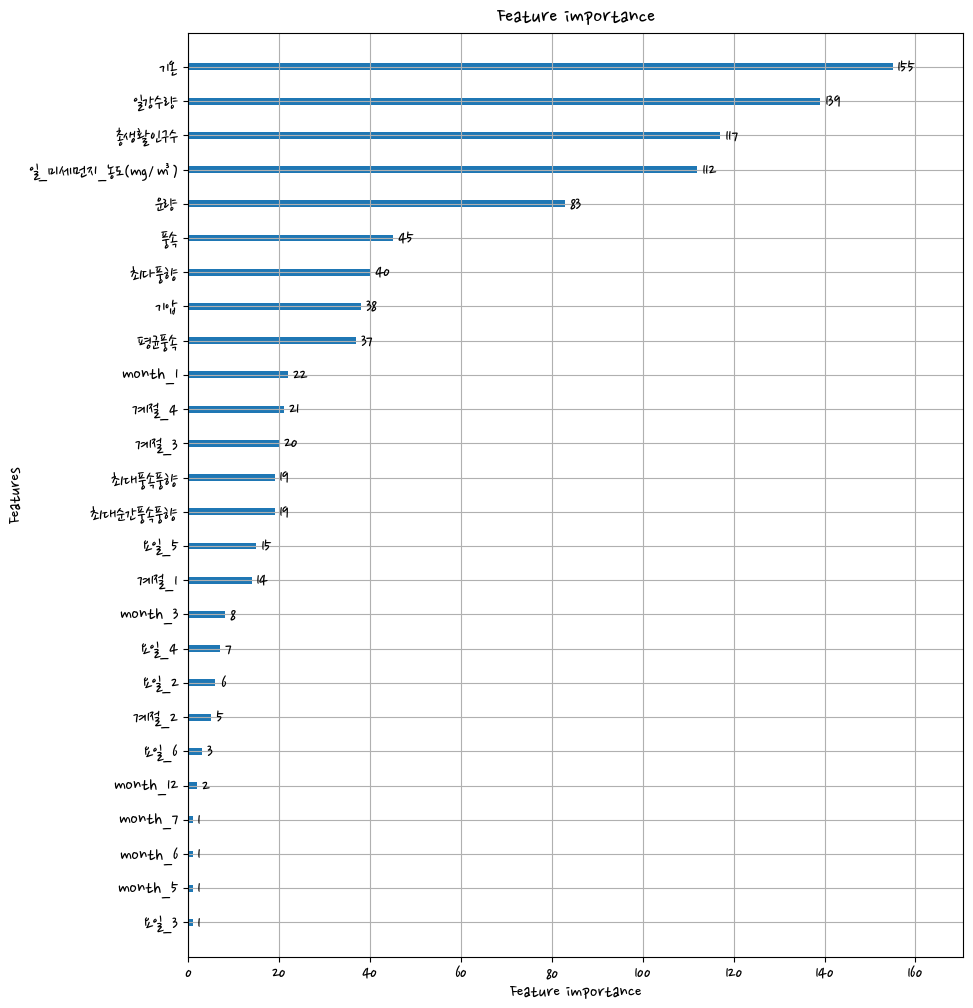

In [49]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

In [50]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

9337.000000000007, 9951.421875
7968.0000000000055, 7764.669921875
2553.0000000000005, 1567.0406494140625
12961.00000000001, 11381.662109375
12360.0, 11439.2978515625
7135.000000000004, 5218.28076171875
1245.0, 1280.01123046875
7810.000000000003, 9910.474609375
6832.0, 4027.899658203125
3422.9999999999973, 4199.875
6723.999999999995, 9333.0224609375
1650.0000000000007, 1112.1348876953125
9233.000000000005, 9066.990234375
10804.999999999995, 8948.74609375
10514.000000000005, 9656.833984375
2708.000000000001, 2507.501220703125
6105.000000000004, 4978.03271484375
12763.999999999998, 11859.095703125
8104.999999999997, 9090.5078125
5853.000000000004, 7435.52392578125
7522.000000000001, 6924.59619140625
9205.999999999995, 9031.87890625
4140.999999999998, 4594.86328125
4547.999999999996, 4606.294921875
5841.0, 6498.37841796875
7479.999999999995, 6874.49609375
3591.9999999999977, 4180.0146484375
2670.0000000000005, 3727.4013671875
10020.999999999998, 9111.8359375
4722.000000000004, 5464.9057617

In [ ]:
from hyperopt import hp

In [ ]:
lgb_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}


In [ ]:
from hyperopt import STATUS_OK

In [ ]:
# def objective_func(lgb_space):
#     max_depth=lgb_space[max_depth]
#     min_child_weight=lgb_space[min_child_weight]
#     learning_rate=lgb_space[learning_rate]
#     colsample_bytree=lgb_space[colsample_bytree]
#     reval = 

In [ ]:
from hyperopt import fmin, tpe, Trials

In [ ]:
# trival_val = Trials()

# best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
#               trials=trial_val, rstate=np.random.default_rng(seed=0))
# print('best:',best_01)